<a href="https://colab.research.google.com/github/alyaaahmed/Electro-Pi-Scholarship/blob/main/ibm_hr_analytics_employee_attrition_performanced1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IBM HR Analytics Employee Attrition & Performanced1.

About Dataset

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.
 - predict which employees are most likely to leave and use that information to design interventions to retain them.
 - 
Education

1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'
JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating

1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'


WorkLifeBalance      

1 'Bad' 
2 'Good'
3 'Better'
4 'Best'

Workflow stages¶    

Question or problem definition.
Acquire training and testing data.
Wrangle, prepare, cleanse the data.
Analyze, identify patterns, and explore the data.
Model, predict and solve the problem.
Visualize, report, and present the problem solving steps and final solution.

In [ ]:

# data analysis 
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.decomposition import PCA
# Metrics
from sklearn.metrics import f1_score, classification_report, make_scorer

import warnings
warnings.filterwarnings("ignore")

In [ ]:
url_data ="https://raw.githubusercontent.com/alyaaahmed/Electro-Pi-Scholarship/main/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df_train=pd.read_csv(url_data)
df_train.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#the data types for various features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#Analyze by describing data¶


In [ ]:
def data_overview(df) :
    print("quick overview  for dataset")
    print("Dataset number of  employee:", df.shape[0])
    print("Number of features:", df.shape[1])
    print(" available features in the dataset",df.columns.values)
    print("Missing values:", df.isnull().sum().values.sum())
    print("number of non unique value \n" , df.nunique())

data_overview(df_train)

quick overview  for dataset
Dataset number of  employee: 1470
Number of features: 35
 available features in the dataset ['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']
Missing values: 0
number of non unique value 
 Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
Education

In [ ]:
#numerical analysis
df_train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# for column in df_train.columns:
#   if df_train[column].dtype== object:
#     print(str(column) +" :"   + df_train[column].unique())
#     print(df_train[column].value_counts)
#     print(20*"*")

categoric_cols=df_train.select_dtypes(include=object).columns.tolist()
categoric_df=pd.DataFrame(df_train[categoric_cols].melt(var_name='column_name', value_name=' column value').value_counts()).rename(columns={0: 'count'}).sort_values(by=['column_name', 'count'])
categoric_df


count
column_name     column value                   
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

In [ ]:
#categroical analysis
df_train.describe(include=['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
#check row duplication
#print how many duplicate rows in the dataframe
print(df_train.duplicated().sum())

0


percentage ofe emplyee stay ,left from the company  No      83.87755102040816%
Yes    16.122448979591837%
Name: Attrition, dtype: object


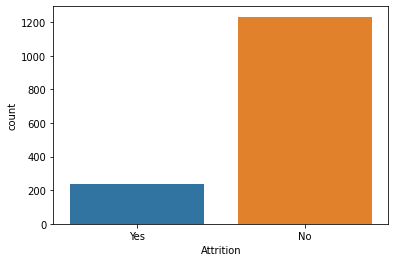

In [ ]:

# calculate percentage ofe emplyee  left from the company 
print("percentage ofe emplyee stay ,left from the company ",  df_train['Attrition'].value_counts(normalize=True).mul(100).astype(str)+'%')

sns.countplot(df_train['Attrition'])

from overview analysis
- data set has 35 rows x 1470 columns
- data doesn`t contain missing values
- there is no duplication in dataset
- Attrition is a categorical feature with yes or no values.
- the percentage of employees who stay at the company is 83.87755102040816%, whereas 16.122448979591837% left the company
 
- Over18 has only one value, yes, so I can drop it
- StandardHours also has one value is 80 , so I can drop it

  #Analyze by pivoting features¶

[link text](https://)prepare  Data        




convert  categorical dat to numerical data

1- converting  df_train['Attrition'] feature  from yes,no to 0,1  





In [ ]:
# Reassign target
df_train['Attrition'].replace(['No','Yes'],[0,1],inplace=True)
df_train['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
def polt_relation(col_name_x,col_name_y,df):
  print(df_train[[col_name_x, col_name_y]].groupby([col_name_x], as_index=False).mean().sort_values(by=col_name_y, ascending=False))
  print(20* "*")
  print(df_train[col_name_x].value_counts())
  print(20* "*")
  sns.countplot(x=col_name_x,hue=col_name_y,data = df)
  plt.figure(figsize = (16, 6))
 
  



   Gender  Attrition
1    Male   0.170068
0  Female   0.147959
********************
Male      882
Female    588
Name: Gender, dtype: int64
********************


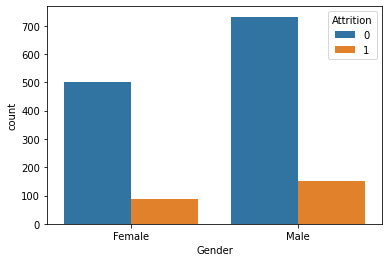

<Figure size 1152x432 with 0 Axes>

In [ ]:
#  relation between gender and Attrition
polt_relation('Gender','Attrition',df_train)

               Department  Attrition
2                   Sales   0.206278
0         Human Resources   0.190476
1  Research & Development   0.138398
********************
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
********************


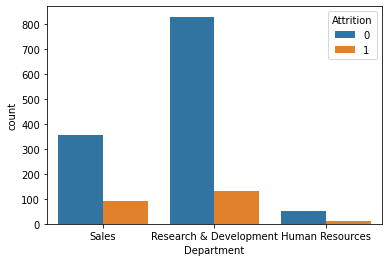

<Figure size 1152x432 with 0 Axes>

In [ ]:
#  relation between Department and Attrition
polt_relation('Department','Attrition',df_train)

  MaritalStatus  Attrition
2        Single   0.255319
1       Married   0.124814
0      Divorced   0.100917
********************
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
********************


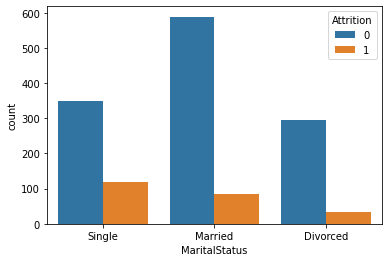

<Figure size 1152x432 with 0 Axes>

In [ ]:
#  relation between MaritalStatus and Attrition
polt_relation('MaritalStatus','Attrition',df_train)

  OverTime  Attrition
1      Yes   0.305288
0       No   0.104364
********************
No     1054
Yes     416
Name: OverTime, dtype: int64
********************


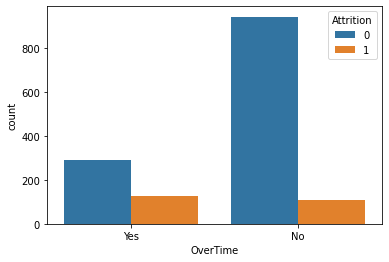

<Figure size 1152x432 with 0 Axes>

In [ ]:
#  relation between MaritalStatus and Attrition
polt_relation('OverTime','Attrition',df_train)

    YearsSinceLastPromotion  Attrition
9                         9   0.235294
15                       15   0.230769
7                         7   0.210526
13                       13   0.200000
0                         0   0.189329
6                         6   0.187500
3                         3   0.173077
2                         2   0.169811
10                       10   0.166667
1                         1   0.137255
14                       14   0.111111
11                       11   0.083333
4                         4   0.081967
5                         5   0.044444
8                         8   0.000000
12                       12   0.000000
********************
0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64
********************


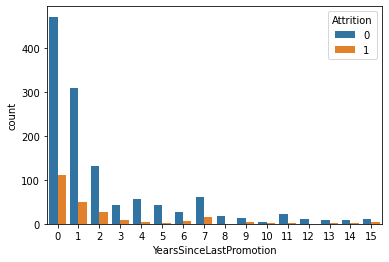

<Figure size 1152x432 with 0 Axes>

In [ ]:
#  relation between YearsSinceLastPromotion and Attrition
polt_relation('YearsSinceLastPromotion','Attrition',df_train)

   TrainingTimesLastYear  Attrition
0                      0   0.277778
4                      4   0.211382
2                      2   0.179159
3                      3   0.140530
1                      1   0.126761
5                      5   0.117647
6                      6   0.092308
********************
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64
********************


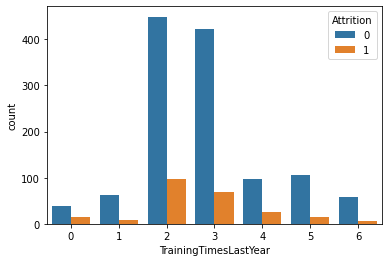

<Figure size 1152x432 with 0 Axes>

In [ ]:
#  relation betweenTrainingTimesLastYear and Attrition
polt_relation('TrainingTimesLastYear','Attrition',df_train)

   RelationshipSatisfaction  Attrition
0                         1   0.206522
2                         3   0.154684
1                         2   0.148515
3                         4   0.148148
********************
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64
********************


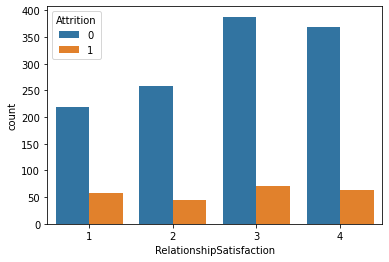

<Figure size 1152x432 with 0 Axes>

In [ ]:
#  relation between RelationshipSatisfaction and Attrition
polt_relation('RelationshipSatisfaction','Attrition',df_train)

     EducationField  Attrition
0   Human Resources   0.259259
5  Technical Degree   0.242424
2         Marketing   0.220126
1     Life Sciences   0.146865
3           Medical   0.135776
4             Other   0.134146
********************
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
********************


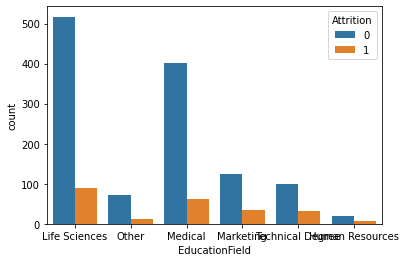

<Figure size 1152x432 with 0 Axes>

In [ ]:
polt_relation('EducationField','Attrition',df_train)

   PerformanceRating  Attrition
1                  4   0.163717
0                  3   0.160772
********************
3    1244
4     226
Name: PerformanceRating, dtype: int64
********************


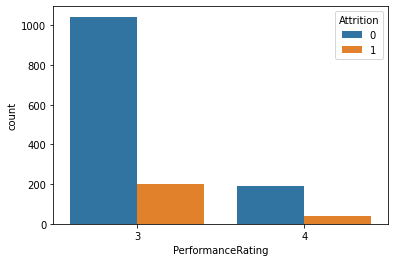

<Figure size 1152x432 with 0 Axes>

In [ ]:
#  relation between PerformanceRating and Attrition
polt_relation('PerformanceRating','Attrition',df_train)

   EnvironmentSatisfaction  Attrition
0                        1   0.253521
1                        2   0.149826
2                        3   0.136865
3                        4   0.134529
********************
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
********************


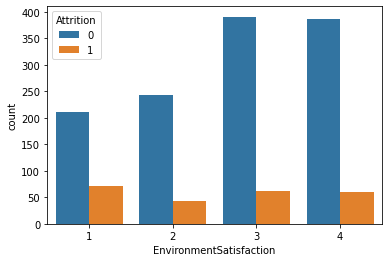

<Figure size 1152x432 with 0 Axes>

In [ ]:
#  relation between EnvironmentSatisfaction  and Attrition
polt_relation('EnvironmentSatisfaction','Attrition',df_train)

In [ ]:
def polt_rang_relation(col_name_x,col_name_y,df):
  plt.figure(figsize = (20, 10))
  

  sns.countplot(x=col_name_x , hue= col_name_y,data=df)




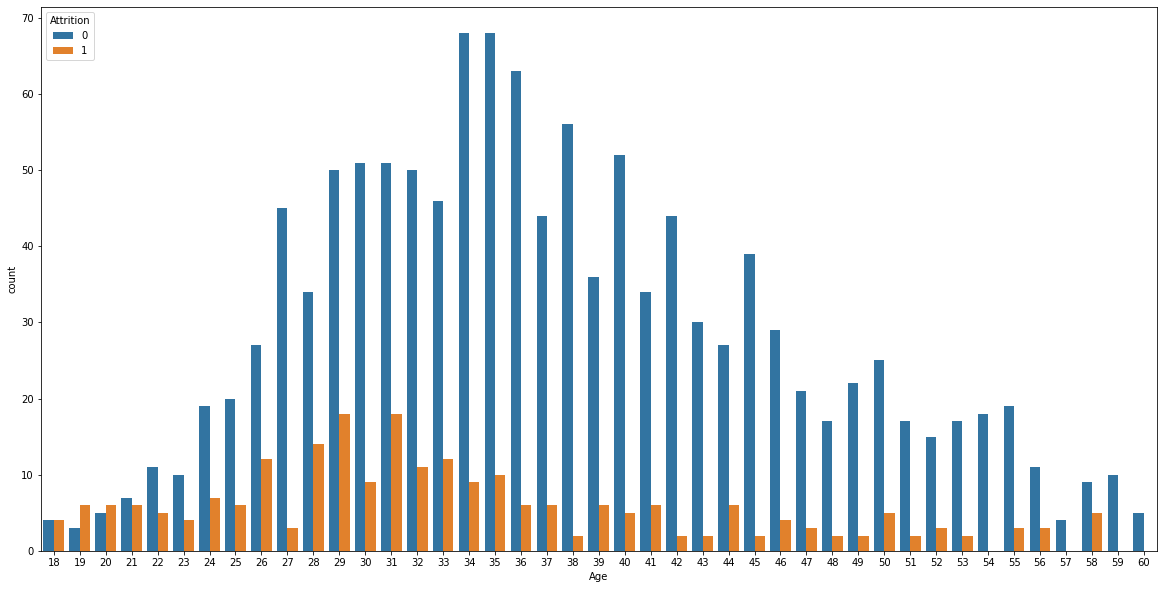

In [ ]:
polt_rang_relation('Age','Attrition',df_train)

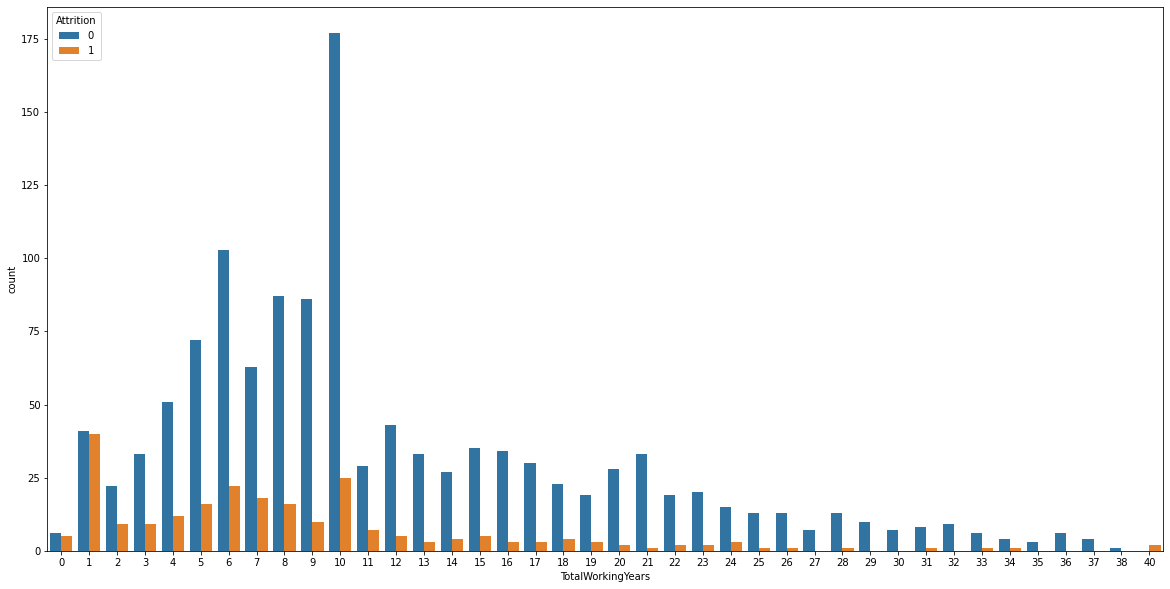

In [ ]:
polt_rang_relation('TotalWorkingYears','Attrition',df_train)

from Analyze by pivoting features¶

- 17 % of people who leave the company is a man whereas 15% women , note  dataset have men more than women 
- The sales department  has a higher percentage of Attrition    = 0.206278
-Marital Status, Single  has a higher percentage of Attrition    = 0.255319
-  people who work overtime have a higher percentage of Attrition    = 0.305288
-An employee who had training between two and five times last year has a higher percentage of Attrition   
- Life Sciences Education Field has a higher percentage of Attrition
the average age for an employee who has a higher percentage of Attrition is between 26 and 32   


Data Processing for training

1-convert  categorical dat to numerical data

2- Outliers


In [ ]:
def LabelEncoderfor_column():
 from sklearn.preprocessing import LabelEncoder
 for column in df_train.columns:
  if df_train[column].dtype== object:
     df_train[column] = LabelEncoder().fit_transform(df_train[column])

 return df_train.head()


In [ ]:
LabelEncoderfor_column()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df_train.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

In [ ]:
df=df_train.copy()

In [ ]:
# Removing unncessary c columns
df_train.drop(['Over18' , 'EmployeeCount','StandardHours','EmployeeNumber'],axis=1,inplace = True)



In [ ]:
df_train.shape



(1470, 31)

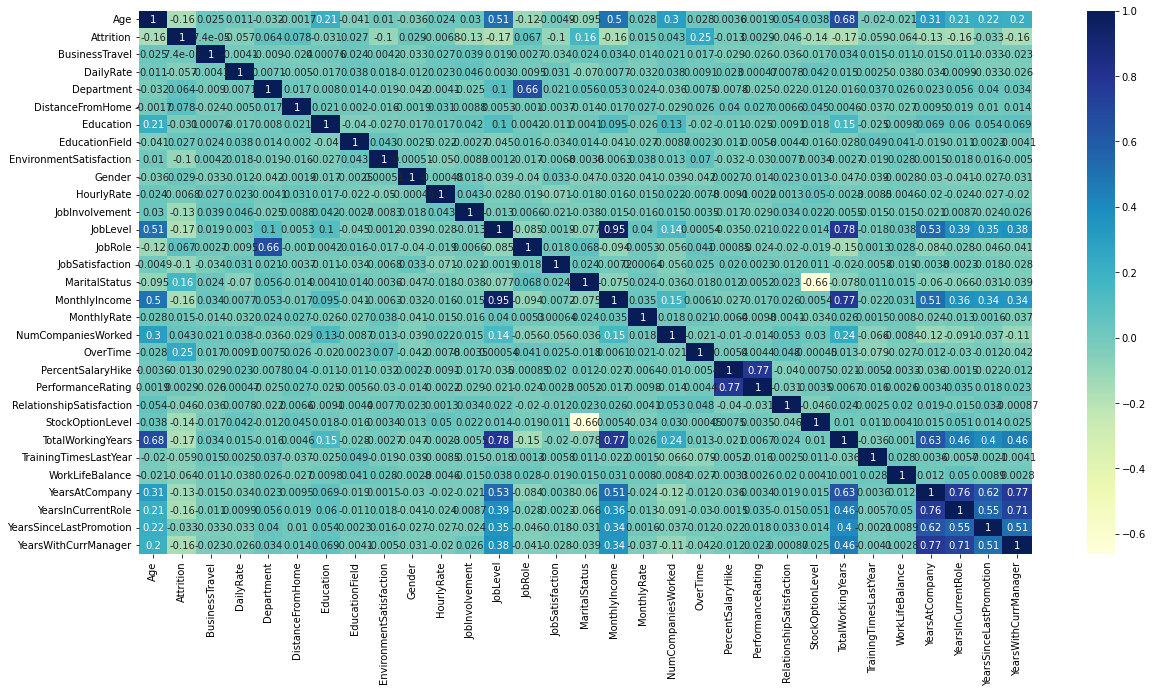

In [ ]:

# check correlation 
corrlation= df_train.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrlation,cmap="YlGnBu", annot = True)




the relation between feature from correlation plot  
1-There is a high correlation between salary  and performance rating 
 as well as job Level and monthly income.

 2-Stock otpion has strong negative correlation with Marital Status
 3-


From the corrolation plot  that:




##Model Training¶




In [ ]:
X = df_train.drop("Attrition", axis=1)
Y = df_train["Attrition"]
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

X_train
X_test
Y_train
Y_test 

442     0
1091    0
981     1
785     0
1332    1
       ..
557     0
831     1
686     0
969     0
1395    1
Name: Attrition, Length: 368, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train
X_test

# MODLING
logistic Regression"



LogisticRegression Train Score is :  86.66
LogisticRegression test Score is :  87.77
***************
Accuracy Score is  =  0.8777173913043478
***************
F1 Score:  0.8777173913043478
***************
confusion matrix 
 [[304   6]
 [ 39  19]]
***************


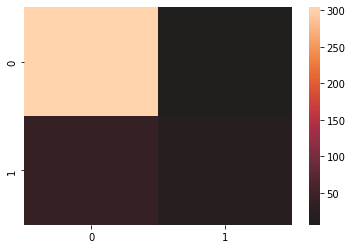

In [ ]:
#fitting logistic Regression to the Training set
#fitting logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix ,f1_score
LogisticRegression = LogisticRegression(max_iter=3000)
LogisticRegression.fit(X_train,Y_train)
Y_pred = LogisticRegression.predict(X_test)

#Calculating Details
acc_log_train_LGR = round(LogisticRegression.score(X_train, Y_train) * 100, 2)
acc_log_test_LGR= round(LogisticRegression.score(X_test, Y_test) * 100, 2)
print('LogisticRegression Train Score is : ',  acc_log_train_LGR)
print('LogisticRegression test Score is : ' , acc_log_test_LGR)

#Calculating Prediction
accuracy= accuracy_score(Y_test , Y_pred )
print(15*"*")
print('Accuracy Score is  = ', accuracy )
print(15*"*")
f1_score_log = metrics.f1_score(Y_test, Y_pred, average='micro')
print('F1 Score: ', f1_score_log)
print(15*"*")
conf = confusion_matrix(Y_test , Y_pred )
print('confusion matrix \n',  conf)
print(15*"*")
sns.heatmap(conf, center = True)
plt.show()


In [ ]:
#grid search 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C' : np.logspace(0.1,2,4,6),
    'penalty': ['l1','l2']
}


best_model_cv = GridSearchCV(estimator=LogisticRegression, param_grid=param_grid, cv= 10)
best_model_cv.fit(X_train, Y_train)

sorted(best_model_cv.cv_results_.keys())
pd.DataFrame(best_model_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

bestscorelg=best_model_cv.best_score_

print('score : ' , best_model_cv.best_score_)
print('params : ' ,best_model_cv.best_params_)
print('best : ' , best_model_cv.best_estimator_)

score :  0.861146601146601
params :  {'C': 23.263050671536263, 'penalty': 'l2'}
best :  LogisticRegression(C=23.263050671536263, max_iter=3000)


SCV     # Support Vector Machines

svc Train Score is :  83.76
svc test Score is :  84.24
***************
Accuracy Score is  =  0.842391304347826
***************
F1 Score:  0.8423913043478262
***************
confusion matrix 
 [[310   0]
 [ 58   0]]
***************


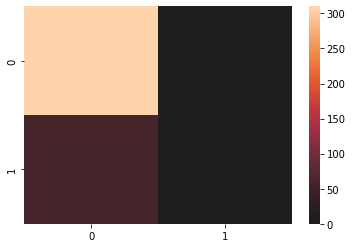

In [ ]:
from sklearn.svm import SVR
svc = SVC( )
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

#Calculating Details
acc_train_svg = round(svc.score(X_train, Y_train) * 100, 2)
acc_test_svg = round(svc.score(X_test, Y_test) * 100, 2)
print('svc Train Score is : ',  acc_train_svg )
print('svc test Score is : ' , acc_test_svg )
#Calculating Prediction
accuracy= accuracy_score(Y_test , Y_pred )
print(15*"*")
print('Accuracy Score is  = ', accuracy )
print(15*"*")
f1_score_log = metrics.f1_score(Y_test, Y_pred, average='micro')
print('F1 Score: ', f1_score_log)
print(15*"*")
conf = confusion_matrix(Y_test , Y_pred )
print('confusion matrix \n',  conf)
print(15*"*")
sns.heatmap(conf, center = True)
plt.show()


In [ ]:
#hyper parmeter 
param_grid = {
    'gamma': [0.001, 0.01, 0.1],
     'C': [1, 2, 3, 4, 5] 
}

best_model_cv = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 10)
best_model_cv.fit(X_train, Y_train)

sorted(best_model_cv.cv_results_.keys())
pd.DataFrame(best_model_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]



print('score : ' , best_model_cv.best_score_)
print('params : ' ,best_model_cv.best_params_)
print('bestmodel : ' , best_model_cv.best_estimator_)


bestscoresvc = best_model_cv.best_score_

score :  0.8375675675675675
params :  {'C': 1, 'gamma': 0.001}
bestmodel :  SVC(C=1, gamma=0.001, max_iter=3000)


# KNN

KNN Train Score is :  87.48
KNN test Score is :  79.89
***************
Accuracy Score is  =  0.7989130434782609
***************
F1 Score:  0.7989130434782609
***************
confusion matrix 
 [[287  23]
 [ 51   7]]
***************


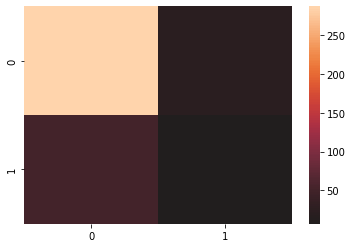

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

#Calculating Details
acc_knn_train = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn_test =round(knn.score(X_test, Y_test) * 100, 2)
print('KNN Train Score is : ',  acc_knn_train )
print('KNN test Score is : ' , acc_knn_test )

#Calculating Prediction
accuracy= accuracy_score(Y_test , Y_pred )
print(15*"*")
print('Accuracy Score is  = ', accuracy )
print(15*"*")
f1_score_log = metrics.f1_score(Y_test, Y_pred, average='micro')
print('F1 Score: ', f1_score_log)
print(15*"*")
conf = confusion_matrix(Y_test , Y_pred )
print('confusion matrix \n',  conf)
print(15*"*")
sns.heatmap(conf, center = True)
plt.show()


grid for KNN

In [ ]:
param_grid = {
    'n_neighbors': range(1,10)
}

best_model_cv = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 10)
best_model_cv.fit(X_train, Y_train)

sorted(best_model_cv.cv_results_.keys())
pd.DataFrame(best_model_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]



print('score : ' , best_model_cv.best_score_)
print('params : ' ,best_model_cv.best_params_)
print('bestmodel : ' , best_model_cv.best_estimator_)
bestscoreknn = best_model_cv.best_score_

score :  0.8403030303030302
params :  {'n_neighbors': 8}
bestmodel :  KNeighborsClassifier(n_neighbors=8)


# Gaussian Naive Bayes

gaussian Train Score is :  78.86
gaussian test Score is :  79.62
***************
Accuracy Score is  =  0.7961956521739131
***************
F1 Score:  0.7961956521739132
***************
confusion matrix 
 [[257  53]
 [ 22  36]]
***************


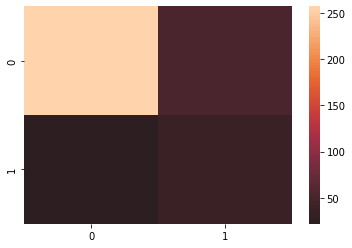

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian_train = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian_test =round(gaussian.score(X_test, Y_test) * 100, 2)
#Calculating Details
acc_gaussian_train= round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian_test = round(gaussian.score(X_test, Y_test) * 100, 2)
print('gaussian Train Score is : ',  acc_gaussian_train )
print('gaussian test Score is : ' , acc_gaussian_test )


#Calculating Prediction
accuracy= accuracy_score(Y_test , Y_pred )
print(15*"*")
print('Accuracy Score is  = ', accuracy )
print(15*"*")
f1_score_log = metrics.f1_score(Y_test, Y_pred, average='micro')
print('F1 Score: ', f1_score_log)
print(15*"*")
conf = confusion_matrix(Y_test , Y_pred )
print('confusion matrix \n',  conf)
print(15*"*")
sns.heatmap(conf, center = True)
plt.show()


Decision Tree


decision_tree Train Score is :  100.0
decision_tree test Score is :  79.08
***************
Accuracy Score is  =  0.7907608695652174
***************
F1 Score:  0.7907608695652175
***************
confusion matrix 
 [[273  37]
 [ 40  18]]
***************


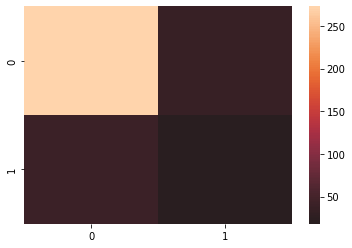

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

#Calculating Details
acc_decision_tree_train = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree_test= round(decision_tree.score(X_test, Y_test) * 100, 2)
print('decision_tree Train Score is : ',  acc_decision_tree_train)
print('decision_tree test Score is : ' , acc_decision_tree_test)
#Calculating Prediction
#Calculating Prediction
accuracy= accuracy_score(Y_test , Y_pred )
print(15*"*")
print('Accuracy Score is  = ', accuracy )
print(15*"*")
f1_score_log = metrics.f1_score(Y_test, Y_pred, average='micro')
print('F1 Score: ', f1_score_log)
print(15*"*")
conf = confusion_matrix(Y_test , Y_pred )
print('confusion matrix \n',  conf)
print(15*"*")
sns.heatmap(conf, center = True)
plt.show()


In [ ]:
param_grid = {
    'min_samples_leaf': [5, 10, 12,20, 50],
    'criterion': ["gini", "entropy"],
    'max_depth': [4,2, 6,3,8] 
}

best_model_cv = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv= 10)
best_model_cv.fit(X_train, Y_train)

sorted(best_model_cv.cv_results_.keys())
pd.DataFrame(best_model_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]



print('score : ' , best_model_cv.best_score_)
print('params : ' ,best_model_cv.best_params_)
print('bestmodel : ' , best_model_cv.best_estimator_)
bestscoreDT=best_model_cv.best_score_

score :  0.8375675675675675
params :  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 12}
bestmodel :  DecisionTreeClassifier(max_depth=4, min_samples_leaf=12)


Model evaluation¶

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'DecisionTree', 'Naive Bayes'],
    'Score': [bestscoresvc, bestscoreknn, bestscorelg  , bestscoreDT,  accuracy]})
               
       
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.861147
1,KNN,0.840303
0,Support Vector Machines,0.837568
3,DecisionTree,0.837568
4,Naive Bayes,0.790761
